In [1]:
import warnings

warnings.filterwarnings('ignore')

# 2 基础可视化 

## 2.1 GeoSeries

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 设置matplotlib绘图模式为嵌入式
%matplotlib inline 
plt.rcParams["font.family"] = "SimHei" # 设置全局中文字体为黑体

# 读入中国领土面数据
china = gpd.read_file('zip://china-shapefiles.zip!china-shapefiles/china.shp',
                     encoding='utf-8')
# 由于每行数据是单独的面，因此按照其省份列OWNER融合
china = china.dissolve(by='OWNER').reset_index(drop=False)

# 读入南海九段线线数据
nine_lines = gpd.read_file('zip://china-shapefiles.zip!china-shapefiles/china_nine_dotted_line.shp',
                          encoding='utf-8')
china.head(5)

,OWNER,geometry,AREA,BOUND_A_,BOUND_A_ID,FCNAME,FENAME,NAME,PERIMETER,SOC
0,上海市,"MULTIPOLYGON (((121.42610 30.68615, 121.42580 ...",0.095629,1464,1456,上海市,Shanghai Shi,None,1.84194,CHN
1,云南省,"POLYGON ((105.30025 27.70911, 105.29577 27.698...",34.279700,1728,1718,云南省,Yunnan Sheng,None,58.07120,CHN
2,内蒙古自治区,"POLYGON ((121.48938 53.33117, 121.49769 53.320...",129.067000,7,6,内蒙古自治区,Neimongol Zizhiqu,None,133.99400,CHN
3,北京市,"POLYGON ((117.37974 40.22687, 117.38528 40.223...",1.735750,183,195,北京市,Beijing Shi,None,9.37237,CHN
4,台湾省,"MULTIPOLYGON (((119.41590 23.21011, 119.43546 ...",0.000062,2143,2129,黄尾屿,Huangwei Yu,OKINAWA,0.03018,CHN


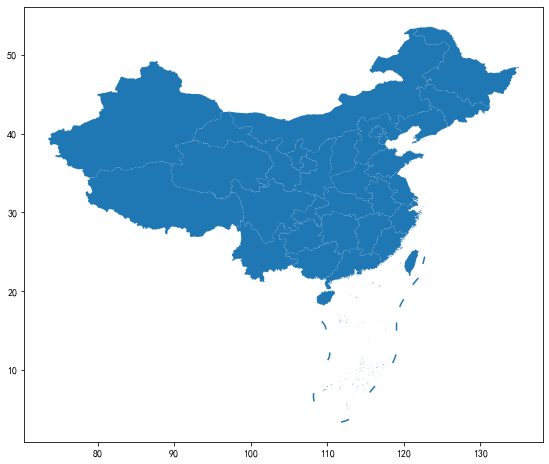

In [3]:
#用plot()方法叠加绘制不带任何个性化参数的原始地图（CRS为EPSG:4326即WGS84）：
# 初始化图床
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.plot(ax=ax)
ax = nine_lines.geometry.plot(ax=ax)
fig.savefig('图1.png', dpi=300)

- **Step1：选择合适的投影**

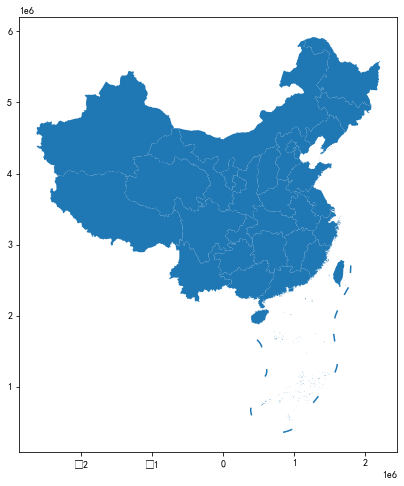

In [4]:
# 定义CRS
albers_proj = '+proj=aea +lat_1=25 +lat_2=47 +lon_0=105'

fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax)
fig.savefig('图3.png', dpi=300)

- **Step2：修改填充色**

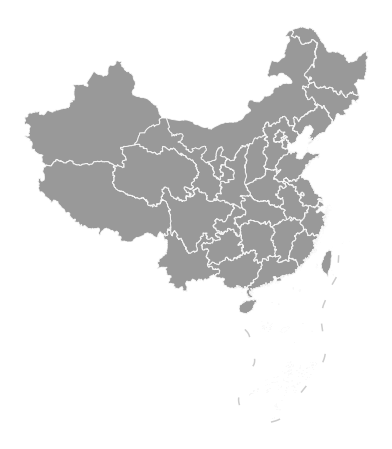

In [5]:
# 下面我们来调整面数据的填充色与轮廓色，线数据（九段线）的色彩。
# 并分别设置透明度alpha，这里为了美观，将坐标轴顺便移除：
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  alpha=0.4)
ax.axis('off') # 移除坐标轴
fig.savefig('图4.png', dpi=300)

- **Step3：修改线型与线宽**

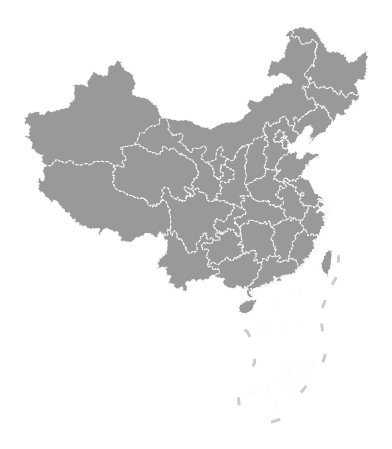

In [6]:
# 我们维持九段线线型不变但适当增大其宽度为3，面数据的轮廓则设置为'--'
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)
ax.axis('off') # 移除坐标轴
fig.savefig('图6.png', dpi=300)

- **Step4：修改面填充阴影线样式**

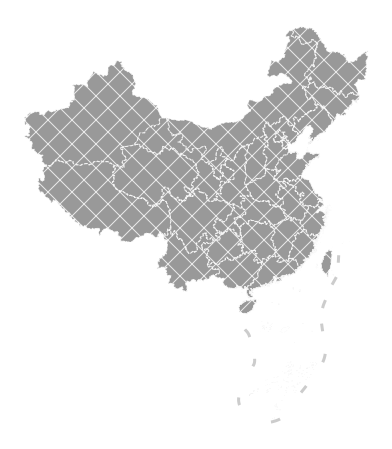

In [7]:
#是hatch='x'时：
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             hatch='x',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)
ax.axis('off') # 移除坐标轴
fig.savefig('图8.png', dpi=300)

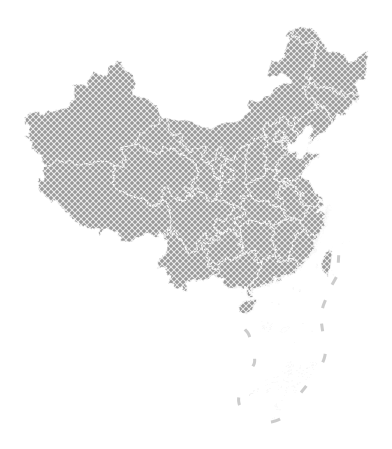

In [8]:
#而hatch='xxxx'时绘制出的地图如下：
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             hatch='xxxx',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)
ax.axis('off') # 移除坐标轴
fig.savefig('图9.png', dpi=300)

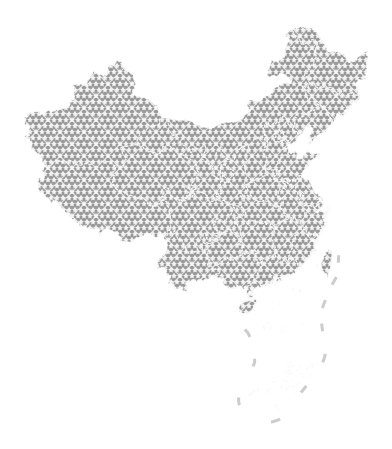

In [9]:
#不同阴影模式可以混合在一起,譬如我们下面设置hatch='x**'
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             hatch='x**',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)
ax.axis('off') # 移除坐标轴
fig.savefig('图10.png', dpi=300)

- **Step5：点数据个性化**

为了举例说明，下面我们来从已有的数据中生成点数据，我最开始的想法是为每个面生成重心，作为每个省份的中心点：

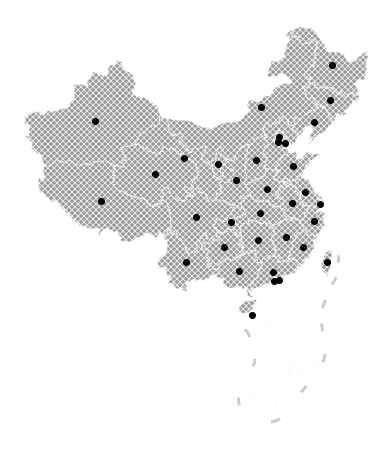

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             hatch='xxxx',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)
ax = china.geometry.centroid.to_crs(albers_proj).plot(ax=ax,
                                                      facecolor='black')
ax.axis('off') # 移除坐标轴
fig.savefig('图11.png', dpi=300)

但是细心观察可以发现，有些省份的重心很尴尬地落在外面  
好在geopandas为我们提供了representative_point()方法，用于求出任意多边形内部的一个典型点：

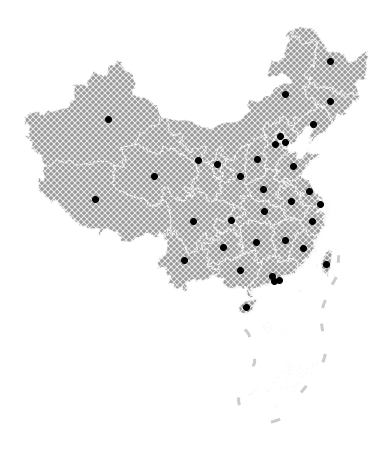

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             hatch='xxxx',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)
ax = china.geometry.representative_point() \
                   .to_crs(albers_proj) \
                   .plot(ax=ax, 
                         facecolor='black')
ax.axis('off') # 移除坐标轴
fig.savefig('图12.png', dpi=300)

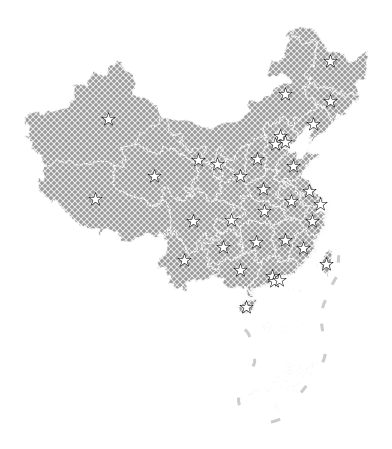

In [12]:
#譬如我们将marker修改为'*'，并调整相关的其他参数使得点看起来更加明显
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             hatch='xxxx',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)
ax = china.geometry.representative_point() \
                   .to_crs(albers_proj) \
                   .plot(ax=ax, 
                         facecolor='white',
                         edgecolor='black',
                         marker='*',
                         markersize=200,
                         linewidth=0.5)
ax.axis('off') # 移除坐标轴
fig.savefig('图14.png', dpi=300)

- **Step6：图例与文字标注**

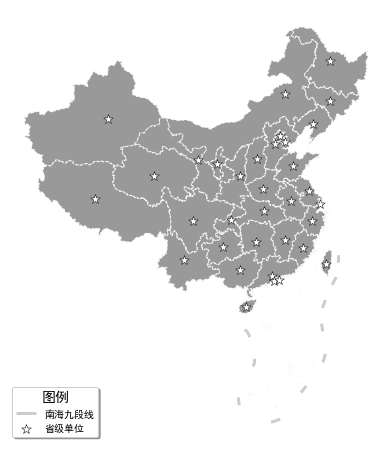

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4,
                                                  label='南海九段线')
ax = china.geometry.representative_point() \
                   .to_crs(albers_proj) \
                   .plot(ax=ax, 
                         facecolor='white',
                         edgecolor='black',
                         marker='*',
                         markersize=100,
                         linewidth=0.5,
                         label='省级单位')
# 单独提前设置图例标题大小
plt.rcParams['legend.title_fontsize'] = 14

# 设置图例标题，位置，排列方式，是否带有阴影
ax.legend(title="图例", loc='lower left', ncol=1, shadow=True)

ax.axis('off') # 移除坐标轴
fig.savefig('图15.png', dpi=300)

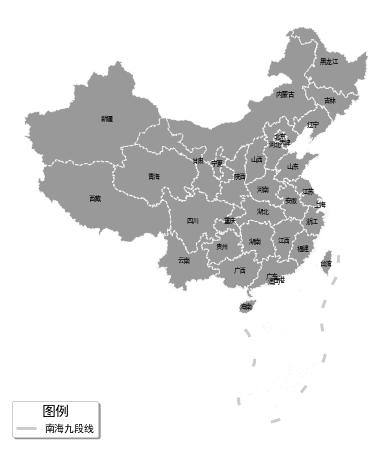

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4,
                                                  label='南海九段线')

# 根据转换过投影的代表点，循环添加文字至地图上对应位置
for idx, _ in enumerate(china.geometry.representative_point().to_crs(albers_proj)):
    # 提取省级单位简称
    if ('自' in china.loc[idx, 'OWNER'] or '特' in china.loc[idx, 'OWNER']) \
    and china.loc[idx, 'OWNER'] != '内蒙古自治区':
        region = china.loc[idx, 'OWNER'][:2]
    else:
        region = china.loc[idx, 'OWNER'].replace('省', '') \
                                        .replace('市', '') \
                                        .replace('自治区', '')

    ax.text(_.x, _.y, region, ha="center", va="center", size=6.5)

# 单独提前设置图例标题大小
plt.rcParams['legend.title_fontsize'] = 14

# 设置图例标题，位置，排列方式，是否带有阴影
ax.legend(title="图例", loc='lower left', ncol=1, shadow=True)

ax.axis('off') # 移除坐标轴
fig.savefig('图16.png', dpi=600)

- **Step7：添加小地图**

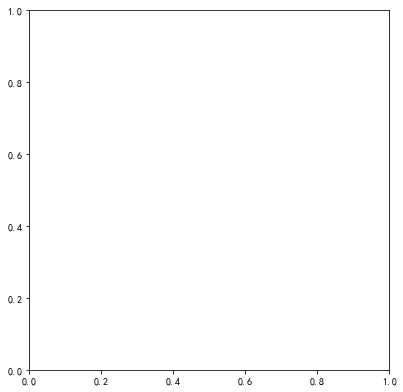

In [15]:
fig = plt.figure(figsize=(5, 5))

# 创建填满画布的坐标轴
ax = fig.add_axes((0, 0, 1, 1))

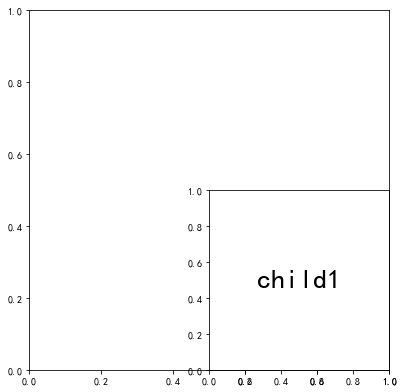

In [16]:
ax_child = fig.add_axes((0.5, 0, 0.5, 0.5))

ax_child.text(0.5, 0.5, 'child1', fontsize=28, ha="center", va="center")
fig

In [17]:
from shapely.geometry import Point

bound = gpd.GeoDataFrame({
    'x': [80, 150, 106.5, 123],
    'y': [15, 50, 2.8, 24.5]
})
# 添加矢量列
bound.geometry = bound.apply(lambda row: Point([row['x'], row['y']]), axis=1)
# 初始化CRS
bound.crs = 'EPSG:4326'
# 再投影
bound.to_crs(albers_proj, inplace=True)
bound

,x,y,geometry
0,80.0,15.0,POINT (-2768046.352 1877156.140)
1,150.0,50.0,POINT (3161415.691 6145855.074)
2,106.5,2.8,POINT (186777.320 275054.816)
3,123.0,24.5,POINT (1817141.987 2723810.909)


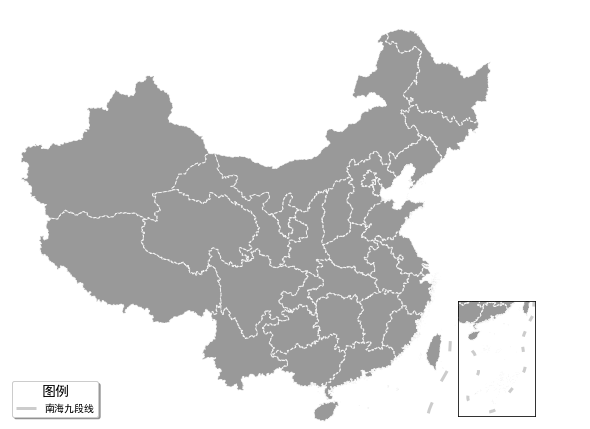

In [18]:
fig = plt.figure(figsize=(8, 8))

# 创建覆盖整个画布的子图1
ax = fig.add_axes((0, 0, 1, 1))
ax = china.geometry.to_crs(albers_proj).plot(ax=ax,
                                             facecolor='grey',
                                             edgecolor='white',
                                             linestyle='--',
                                             alpha=0.8)
ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4,
                                                  label='南海九段线')

# 单独提前设置图例标题大小
plt.rcParams['legend.title_fontsize'] = 14

# 设置图例标题，位置，排列方式，是否带有阴影
ax.legend(title="图例", loc='lower left', ncol=1, shadow=True)

ax.axis('off') # 移除坐标轴
ax.set_xlim(bound.geometry[0].x, bound.geometry[1].x)
ax.set_ylim(bound.geometry[0].y, bound.geometry[1].y)

# 创建南海插图对应的子图，这里的位置和大小信息是我调好的，你可以试着调节看看有什么不同
ax_child = fig.add_axes([0.75, 0.15, 0.2, 0.2])
ax_child = china.geometry.to_crs(albers_proj).plot(ax=ax_child,
                                                   facecolor='grey',
                                                   edgecolor='white',
                                                   linestyle='--',
                                                   alpha=0.8)
ax_child = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax_child,
                                                        edgecolor='grey',
                                                        linewidth=3,
                                                        alpha=0.4,
                                                        label='南海九段线')

ax_child.set_xlim(bound.geometry[2].x, bound.geometry[3].x)
ax_child.set_ylim(bound.geometry[2].y, bound.geometry[3].y)

# 移除子图坐标轴刻度，因为这里的子图需要有边框，所以只移除坐标轴刻度
ax_child.set_xticks([])
ax_child.set_yticks([])

fig.savefig('图20.png', dpi=300)

## 2.2 GeoDataFrame

- **Step0：数据预处理**

In [19]:
import pandas as pd

# 读取原始数据
raw = pd.read_csv('DXYArea.csv', parse_dates=['updateTime'])

# 抽取updateTime列中的年、月、日信息分别保存到新列中
raw['year'], raw['month'], raw['day'] = list(zip(*raw['updateTime'].apply(lambda d: (d.year, d.month, d.day))))

# 得到每个省份最新的指标数据
temp = raw.sort_values(['provinceName', 'updateTime'], 
                ascending=False, 
                ignore_index=True).groupby('provinceName') \
                                  .first() \
                                  .reset_index(drop=False) \
                                  .loc[:, ['provinceName', 
                                           'provinceEnglishName',
                                           'province_confirmedCount',
                                           'province_suspectedCount',
                                           'province_curedCount',
                                           'province_deadCount']]

# 查看前5行
temp.head()

,provinceName,provinceEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount
0,上海市,Shanghai,337,0,276,3
1,云南省,Yunnan,174,0,150,2
2,内蒙古自治区,Neimenggu,75,0,42,0
3,北京市,Beijing,410,0,248,5
4,吉林省,Jilin,93,0,67,1


### 2.2.1 地区分布图与分层设色

In [20]:
data_with_geometry = pd.merge(left=temp.replace('澳门', '澳门特别行政区'),
                              right=china,
                              left_on='provinceName',
                              right_on='OWNER',
                              how='right'
                              ).loc[:, ['OWNER',
                                        'provinceEnglishName',
                                        'province_confirmedCount',
                                        'province_suspectedCount',
                                        'province_curedCount',
                                        'province_deadCount',
                                        'geometry'
                                        ]]
# 将数据从DataFrame转换为GeoDataFrame
data_with_geometry = gpd.GeoDataFrame(data_with_geometry, crs='EPSG:4326')
data_with_geometry.head()

,OWNER,provinceEnglishName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,geometry
0,上海市,Shanghai,337.0,0.0,276.0,3.0,"MULTIPOLYGON (((121.42610 30.68615, 121.42580 ..."
1,云南省,Yunnan,174.0,0.0,150.0,2.0,"POLYGON ((105.30025 27.70911, 105.29577 27.698..."
2,内蒙古自治区,Neimenggu,75.0,0.0,42.0,0.0,"POLYGON ((121.48938 53.33117, 121.49769 53.320..."
3,北京市,Beijing,410.0,0.0,248.0,5.0,"POLYGON ((117.37974 40.22687, 117.38528 40.223..."
4,台湾省,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((119.41590 23.21011, 119.43546 ..."


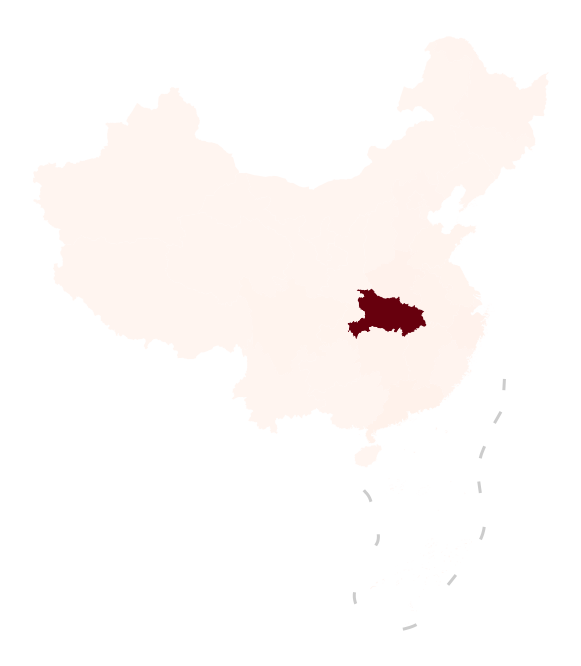

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds')

ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)

ax.axis('off')

fig.savefig('图23.png', dpi=300)

- **台湾省跑哪里去了？**

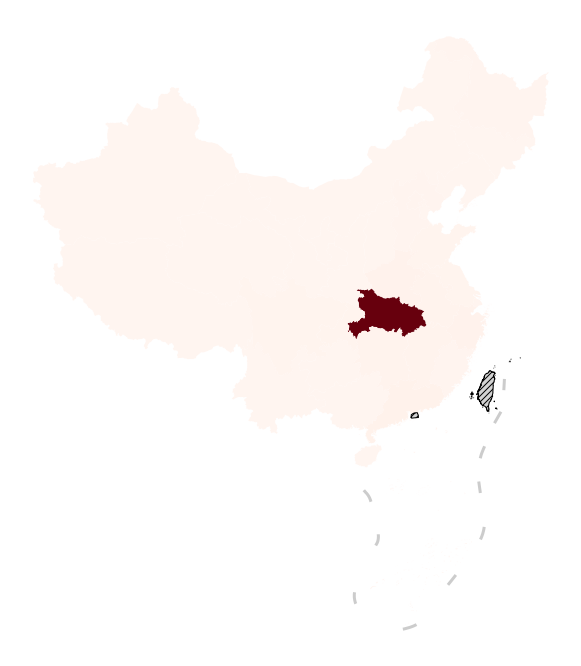

In [22]:
fig, ax = plt.subplots(figsize=(12, 12))

# 新增缺失值处理参数
ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////"
                                                 })

ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)

ax.axis('off')

fig.savefig('图24.png', dpi=300)

- **为什么只有湖北省颜色这么深？**

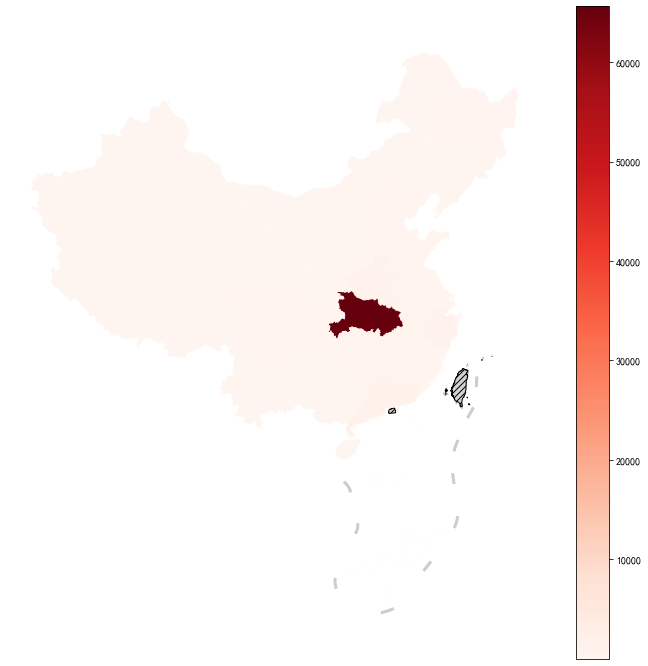

In [23]:
fig, ax = plt.subplots(figsize=(12, 12))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////"
                                                 },
                                                 legend=True)

ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)

ax.axis('off')

fig.savefig('图25.png', dpi=300)

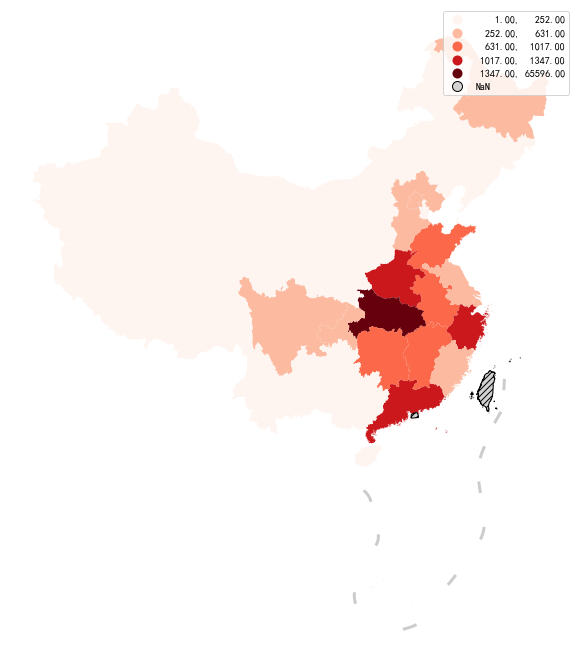

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////"
                                                 },
                                                 legend=True,
                                                 scheme='NaturalBreaks',
                                                 k=5)

ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)

ax.axis('off')

fig.savefig('图26.png', dpi=300)

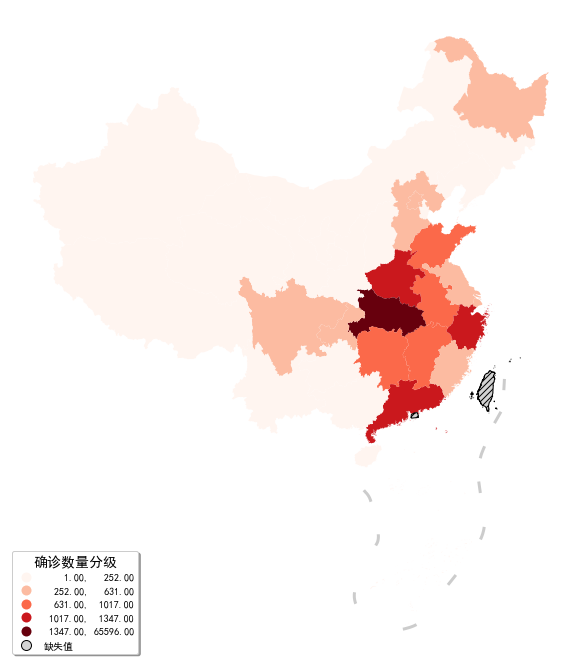

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////",
                                                     "label": "缺失值"
                                                 },
                                                 legend=True,
                                                 scheme='NaturalBreaks',
                                                 k=5,
                                                 legend_kwds={
                                                     'loc': 'lower left',
                                                     'title': '确诊数量分级',
                                                     'shadow': True
                                                 })

ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)

ax.axis('off')

fig.savefig('图27.png', dpi=300)

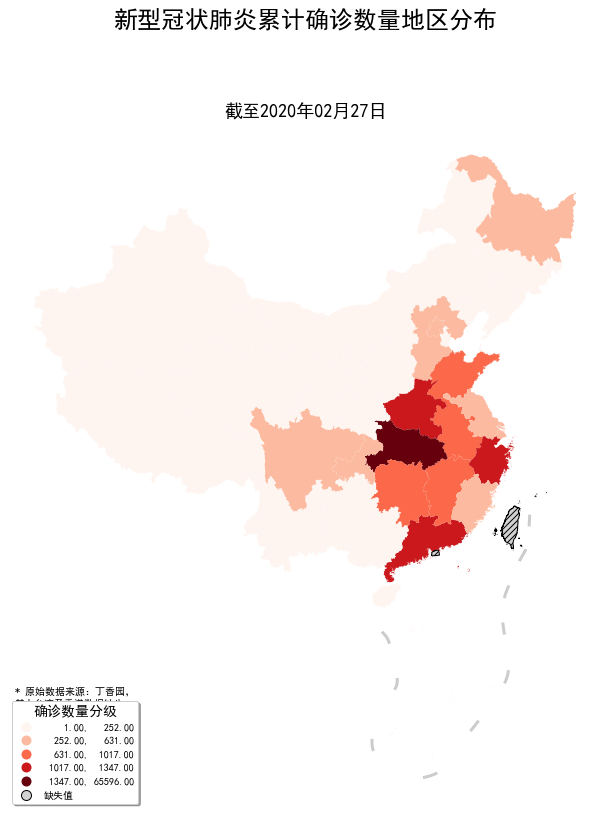

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))

ax = data_with_geometry.to_crs(albers_proj).plot(ax=ax,
                                                 column='province_confirmedCount',
                                                 cmap='Reds',
                                                 missing_kwds={
                                                     "color": "lightgrey",
                                                     "edgecolor": "black",
                                                     "hatch": "////",
                                                     "label": "缺失值"
                                                 },
                                                 legend=True,
                                                 scheme='NaturalBreaks',
                                                 k=5,
                                                 legend_kwds={
                                                     'loc': 'lower left',
                                                     'title': '确诊数量分级',
                                                     'shadow': True
                                                 })

ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)

ax.axis('off')
plt.suptitle('新型冠状肺炎累计确诊数量地区分布', fontsize=24) # 添加最高级别标题
plt.title('截至2020年02月27日', fontsize=18) # 添加大标题
plt.tight_layout(pad=4.5) # 调整不同标题之间间距
ax.text(-2800000, 1000000, '* 原始数据来源：丁香园，\n其中台湾及香港数据缺失') # 添加数据说明

fig.savefig('图28.png', dpi=300)

### 2.2.2 搭配matplotlib实现创作

- **将数值映射到圆圈与文字**

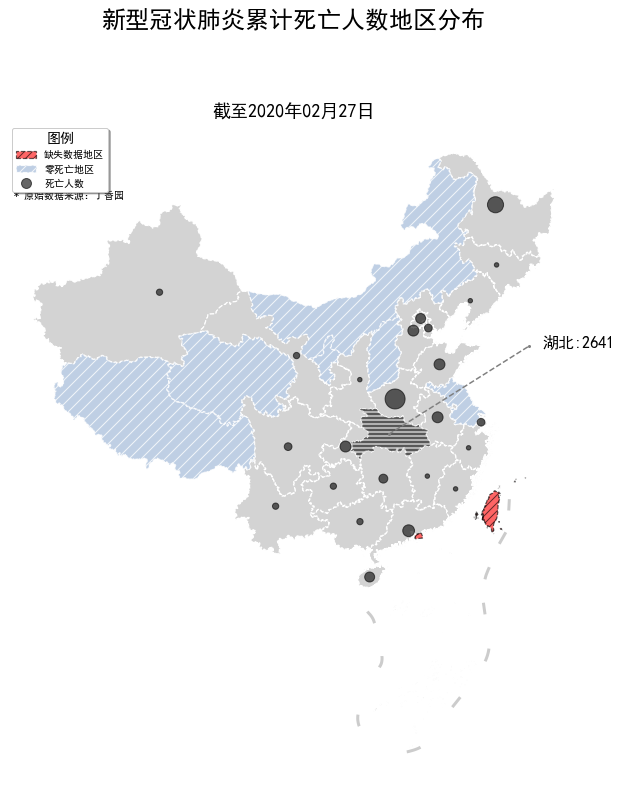

In [28]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(12, 12))

data_with_geometry['point'] = data_with_geometry.representative_point()

data_with_geometry.set_geometry('geometry', inplace=True)
ax = data_with_geometry[(-data_with_geometry['provinceEnglishName'].isnull())&(data_with_geometry['province_deadCount'] != 0)] \
                                                                            .to_crs(albers_proj) \
                                                                            .plot(ax=ax,
                                                                                  facecolor='lightgrey',
                                                                                  edgecolor='white',
                                                                                  linestyle='--',
                                                                                  linewidth=1.2)

ax = data_with_geometry[(-data_with_geometry['provinceEnglishName'].isnull())&(data_with_geometry['province_deadCount'] == 0)] \
                                                                            .to_crs(albers_proj) \
                                                                            .plot(ax=ax,
                                                                                  facecolor='lightsteelblue',
                                                                                  edgecolor='white',
                                                                                  linestyle='--',
                                                                                  linewidth=1.2,
                                                                                  hatch='//',
                                                                                  alpha=0.8)

ax = data_with_geometry[data_with_geometry['provinceEnglishName'].isnull()].to_crs(albers_proj) \
                                                                           .plot(ax=ax,
                                                                                 facecolor='red',
                                                                                 alpha=0.6,
                                                                                 edgecolor='black',
                                                                                 linestyle='--',
                                                                                 linewidth=1.2,
                                                                                 hatch='///')

ax = data_with_geometry[data_with_geometry['OWNER'] == '湖北省'].to_crs(albers_proj).plot(ax=ax,
                                                                                         facecolor='grey',
                                                                                         hatch='---',
                                                                                         alpha=0.4)

ax.plot([672345, 1.97424*10**6], 
             [3.30937*10**6, 4.12771*10**6], 
             'go',
             color='grey', 
             linestyle='--', 
             markersize=2)

ax.text(2.1*10**6, 4.12771*10**6, '湖北:2641', fontsize=16)


data_with_geometry.set_geometry('point', inplace=True)
ax = data_with_geometry[data_with_geometry['OWNER'] != '湖北省'].to_crs(albers_proj).plot(ax=ax,
                                                                                         markersize=20*data_with_geometry.loc[data_with_geometry['OWNER'] != '湖北省', 'province_deadCount'],
                                                                                         facecolor='black',
                                                                                         alpha=0.6,
                                                                                         scheme='NaturalBreaks',
                                                                                         k=3)

ax = nine_lines.geometry.to_crs(albers_proj).plot(ax=ax,
                                                  edgecolor='grey',
                                                  linewidth=3,
                                                  alpha=0.4)


plt.suptitle('新型冠状肺炎累计死亡人数地区分布', fontsize=24) # 添加最高级别标题
plt.title('截至2020年02月27日', fontsize=18) # 添加大标题
plt.tight_layout(pad=4.5) # 调整不同标题之间间距
ax.text(-2800000, 5500000, '* 原始数据来源：丁香园') # 添加数据说明

LegendElement = [
                 mpatches.Patch(facecolor='red', 
                                alpha=0.6, 
                                edgecolor='black', 
                                linestyle='--', 
                                linewidth=1.2,
                                hatch='///',
                                label='缺失数据地区'),
                 mpatches.Patch(facecolor='lightsteelblue',
                                edgecolor='white',
                                linestyle='--',
                                linewidth=1.2,
                                hatch='//',
                                alpha=0.8,
                                label='零死亡地区'),
                 plt.plot([], [], marker='o', ms=10, ls='', mec=None, color='black', alpha=0.6, label='死亡人数')[0]
                ]
ax.legend(handles = LegendElement, loc='upper left', fontsize=10, title='图例', shadow=True)
ax.axis('off')

fig.savefig('图29.png', dpi=300)

### 2.2.3 在模仿中学习

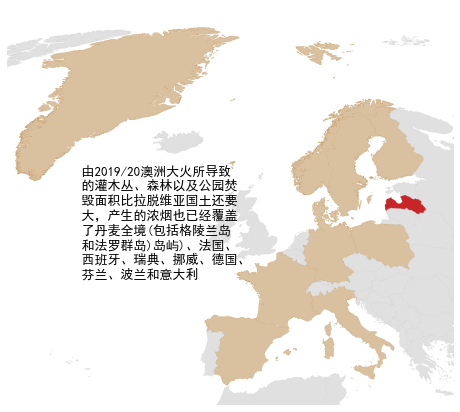

In [ ]:
world = gpd.read_file('world')
world['SOVEREI']

smoke_list = ['Denmark', 'France', 'Spain', 'Sweden', 'Norway', 'Germany', 'Finland', 'Poland', 'Italy', 'Greenland']
burnt_list = ['Latvia']

fig, ax = plt.subplots(figsize=(8, 8))

crs = '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

# 绘制过烟区域
ax = world[world['SOVEREI'].isin(smoke_list)] \
                        .to_crs(crs) \
                        .plot(ax=ax,
                              facecolor='#d9c09e',
                              edgecolor='#c49c67',
                              linewidth=0.2)

# 绘制拉脱维亚
ax = world[world['SOVEREI'].isin(burnt_list)] \
                        .to_crs(crs) \
                        .plot(ax=ax,
                              facecolor='#c82626',
                              edgecolor='#9d1e1e',
                              linewidth=0.2)

# 绘制剩余国家
ax = world[-(world['SOVEREI'].isin(smoke_list) | world['SOVEREI'].isin(burnt_list))] \
                         .to_crs(crs) \
                         .plot(ax=ax,
                               facecolor='lightgrey',
                               edgecolor='grey',
                               linewidth=0.05,
                               alpha=0.7)

ax.set_xlim([-3200000, 2300000])
ax.set_ylim([4100000, 9000000])
ax.axis('off')

# 添加文字
plt.text(-3*10**6, 5.5*10**6, 
         '''
         由2019/20澳洲大火所导致
         的灌木丛、森林以及公园焚
         毁面积比拉脱维亚国土还要
         大，产生的浓烟也已经覆盖
         了丹麦全境(包括格陵兰岛
         和法罗群岛)岛屿)、法国、
         西班牙、瑞典、挪威、德国、
         芬兰、波兰和意大利
         ''', 
         fontdict={
             'color': 'black',
             'weight': 'bold',
             'size': 13
         })

plt.savefig('图31.png', dpi=500)